In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline 

In [2]:
df = pd.read_csv('ArmyPerformance.csv')
df.head()

,Strength,Obedience,Mobility
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [3]:
data = df.copy()

In [4]:
data.info()
# data.ndim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Strength   1000 non-null   int64
 1   Obedience  1000 non-null   int64
 2   Mobility   1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [5]:
data.isnull().sum()

Strength     0
Obedience    0
Mobility     0
dtype: int64

In [6]:
class Cluster:
    
    def __init__(self,center):
        self.center = center
        self.points = []
    
    def distance(self,point):
        return np.sqrt(np.sum((point - self.center)**2))
    
    
    
class Kmeans:
    
    def __init__(self,n_clusters=3,max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
        
        for i in range(self.max_iters):
            labels = []
            
            for point in X:
                
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                
                
#                 if(np.bincount(labels)[0]>100):
#                         print("Entered 100+")
#                         sort_dist = np.sort(distances)
#                         print(sort_dist)
#                         labels.append(1)
                        
                closest_index = np.argmin(distances)
#                 print("closest index",closest_index)

                if(len(labels)>1):
                    if(closest_index==0):
                        if(np.bincount(labels)[0]>=100):
#                             print("Entered 100+")
                            sort_dist = np.sort(distances)
#                             print(sort_dist)
                            labels.append(1)
#                             print(np.bincount(labels))
                        else:
                             closest_cluster = clusters[closest_index]          
                             labels.append(closest_index)
#                              print(np.bincount(labels))
                    else:
                            closest_cluster = clusters[closest_index]          
                            labels.append(closest_index)
#                             print(np.bincount(labels))
                        
                else:
                    closest_cluster = clusters[closest_index]         
                
                    labels.append(closest_index)
#                     print(np.bincount(labels))
        
        for cluster in clusters:
            cluster.center = np.mean(cluster.points,axis=0)
        
        
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        


In [7]:
model = Kmeans()
X =data.to_numpy()
model.fit(X)

C:\Users\kannan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kannan\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C:\Users\kannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Strength'>

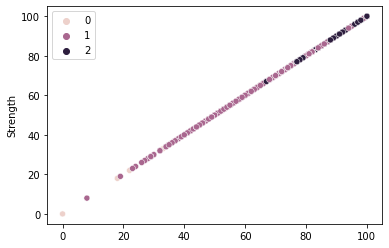

In [8]:
sns.scatterplot(X[:, 0],data['Strength'],hue=model.labels_)

C:\Users\kannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Obedience'>

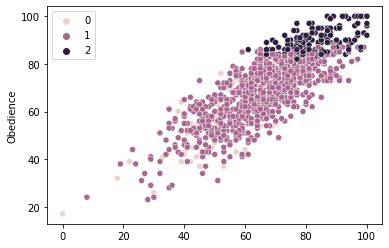

In [9]:
sns.scatterplot(X[:, 0],data['Obedience'],hue=model.labels_)

C:\Users\kannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Mobility'>

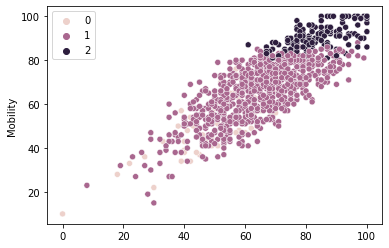

In [10]:
sns.scatterplot(X[:, 0],data['Mobility'],hue=model.labels_)

C:\Users\kannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

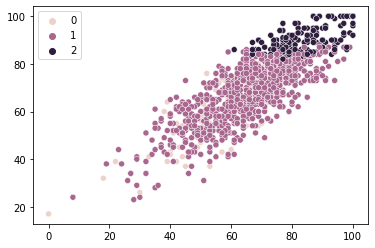

In [11]:
sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)